# Insurance Charges Analysis Using Linear Regression

**Project Overview:**  
This project focuses on analyzing health insurance data from ACME Insurance Inc., a provider of affordable healthcare plans to thousands of customers across the U.S. The dataset contains records from more than 1,300 individuals. By utilizing features such as age, gender, BMI, number of dependents, smoking habits, and geographic region, the objective is to develop a Linear Regression model to accurately predict insurance charges.
---

This project was guided by the folowing tutorial: https://jovian.ai/aakashns/python-sklearn-linear-regression#C206

# Imported libraries

In [94]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Loading and Discovering the Data

In [95]:
url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
df = pd.read_csv(url)

In [96]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Age Distribution

In [99]:
px.histogram(df,x='age',marginal='box',nbins=47,title='Distribution of Age')

The distribution of age is nearly uniform except the 18-20 age groupe which represents an extremly higher count(it is double the mean count).

# BMI Distribution

In [100]:
px.histogram(df,
             x='bmi',
             marginal='box',
             title='Histograme of BMI')

The histogram of BMI shows a roughly normal (bell-shaped) distribution, with the majority of individuals having a BMI between 25 and 35. This range typically falls within the overweight category according to WHO standards.

The peak (mode) appears around 30, indicating that most insured individuals in this dataset are on the higher end of the normal range or are slightly overweight. The distribution is also right-skewed, indicating that the majority falls in obese category nevetheless.

We also notice that the BMI presents a gaussian distribution, however it is very unexpected since age distribution turned out uniform with a slightly higher nulber of young people. This is confusing because young people tend to have normal weight bodies due to their physical activies. On the othe side, having a mean-centered BMI distribution light be because of a natural biological trait that clusters around the average


# Charges

In [101]:
px.histogram(df,
             x='charges',
             marginal='box',
             color='smoker',
             title='Annual Medical Charges')

This distribution is notably folded to the left, this side of the histogramme is containing a notably equal distribution of smoker people and non-smokers. However, the right side,presenting the fewer charges, is mainly composed of smokers. Speaking numbers; the median of non-smokers is 7300 and the median of smokers is close to 35,000.
This suggests that while some non-smokers can have moderate to high medical costs, smokers are consistently associated with higher expenses, likely due to the increased health risks and long-term conditions related to smoking.


# Smoker

In [102]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [103]:
px.histogram(df,
             x='smoker',
             color='sex',
             title='Smoker people according to sex')

According to this distribution, 23.6% of males and 16% of females are smokers which is very aligned with the national statistics from 2010(the year of data collection). This allignement is very helpful and making it suitabel for further health inssurance analysis and modeling. 

In [104]:
px.violin(df,
          y='charges',
          x='children',
          box=True
)

<Axes: xlabel='children', ylabel='charges'>

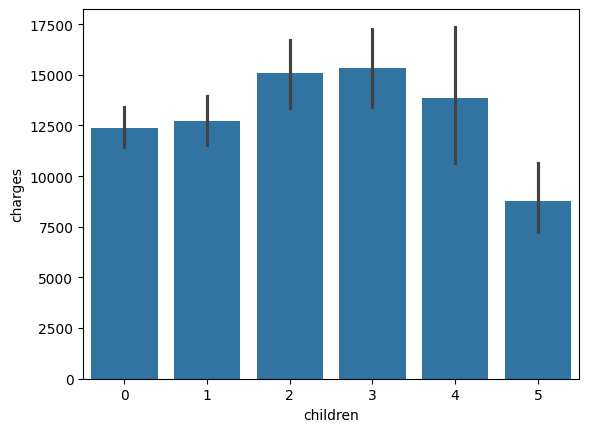

In [105]:
sns.barplot(data=df,y='charges',x='children',estimator='mean')

This distribution is unimodal; it forms a moth curve meanign that as the number of children increses, the charges fluctuate. But overall, it doesn't seem like the effect of children on the charges is significant since the charges with no child are 125000 and with three children(the mode) approximatly is 15000.


Text(0.5, 1.0, 'Purchase amount variation by annual income across regions')

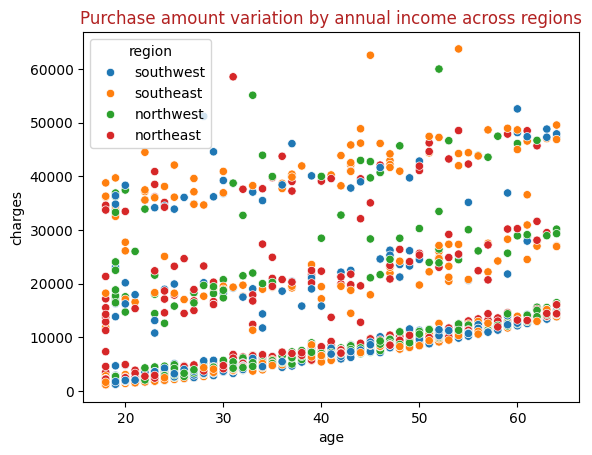

In [106]:
sns.scatterplot(x=df["age"],y=df["charges"],hue=df['region'])
plt.title("Purchase amount variation by annual income across regions",color="firebrick")

In [107]:
px.bar(df.groupby('region', as_index=False)['charges'].mean(), 
       x='region', y='charges', 
       title='Average Charges by Region')

# Age and Charges

let's visualize the relationship between charges and age. We will use a scatter plot. We'll also use the values from the 'smoker' column to color the points

In [108]:
px.scatter(df,x='age',y='charges',color='smoker',title='Charges VS Age')

From the chart above, we can make the observation that charges increase with age. But the age alone is not the only factor in this elevation. We also notice that the scatter is divided into threr "clusters" of points each of whcich seems to form an increasing line:
 - The highest is composed only of smokers, which highlights the direct relation between smoking and the increse of charges
 - In the middle, we find an equal number of smokeers and non-smokers. Nevertheless, even in the middle the smokers have the highest charges
 - In the buttom, the line is formed by non-smokers as excpected presenting the lowest ccharges of all.
Conclusion: 
    - The relationship between age and medical charges is not strictly linear.There's a lot of dispersion.
    - Even younger smokers have higher charges than older non-smokers, indicating that lifestyle choices might be more significant than age alone.
    - Finally, the relationship between age and medical charges is not strictly linear due to the wide spread of values.Smoking is a major cost driver in medical expenses and will give us baited conclusions.

# BMI and Charges

Let's visualize the relationship between charges and BMI. We will use another scatter plot. Again, we'll use the values from the 'smoker' column to color the points

In [109]:
px.scatter(df,x='bmi',y='charges',color='smoker',title='Charges VS BMI')

The scatter plot shows that for non-smokers (red), there’s no clear relationship between BMI and medical charges. Most charges remain relatively low regardless of BMI.

For smokers (blue), however, medical charges tend to rise significantly with BMI. Once BMI exceeds 30, costs often jump above $30,000, suggesting a strong link between obesity, smoking, and high medical expenses.

There appear to be two clusters among smokers—one with moderate charges and another with very high charges. This might reflect different levels of health complications.

Interestingly, some non-smokers with high BMI still have low charges, while almost all smokers have higher charges, even with a normal BMI. This shows that smoking alone greatly increases medical costs, and combining it with high BMI worsens the impact.

# Correlation

The chart shows that "charges" are more influenced by some columns than others—"age" has a visible positive trend with charges, while "bmi" doesn’t.Nevertheless, the column "smoker" seems to have the highest effect.

This strength of relationship is measured using the correlation coefficient, which you can calculate using Pandas’ .corr() function.

In [110]:
print('The correlation betwwen the charges and age is:', df.charges.corr(df.age))
print('The correlation betwwen the charges and BMI is:', df.charges.corr(df.bmi))

The correlation betwwen the charges and age is: 0.2990081933306478
The correlation betwwen the charges and BMI is: 0.19834096883362887


As we already visualized:
    -As age increases, charges tend to increase as well, and this relationship is moderate.
    -As BMI increases, charges also tend to rise, but this relationship is weaker than the one with age.

PLus tat the correlation between charges and age is approximately 0.30, while the correlation between charges and BMI is around 0.20. Indeed,there's a positive relationship between the charges and both these columns even tho with age is stronger.

In [111]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
print('The correlation betwwen the charges and smoking values is:', df.charges.corr(smoker_numeric))

The correlation betwwen the charges and smoking values is: 0.7872514304984778


One of the most striking findings in our correlation analysis is the strong positive relationship between smoking status and medical charges, with a correlation coefficient of 0.78. This is by far the highest correlation among all the variables analyzed, indicating that smoking is a major factor contributing to increased medical expenses.

It implies that in any predictive modeling or linear regression task, smoking should be treated as a key feature, and its effect on charges should be carefully analyzed.


**Now let's see the correlation between all the columns of the data set**

Text(0.5, 1.0, 'Correlation Matrix')

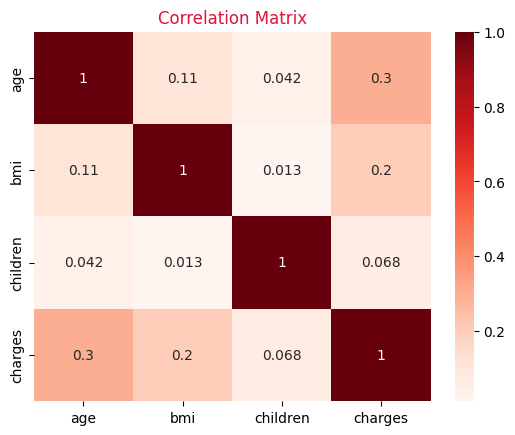

In [112]:
corr_df = df.drop(columns=["sex","region","smoker"])
sns.heatmap(corr_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix',color="crimson")

# Linear Regression using a Single Feature

Once again, the heatmap showed that "smoker" and "age" are key indicators to medical charges values. We’ll now move on to predicting charges, beginning with a filtered dataset containing just non-smoker records.

In [113]:
non_smoker_df=df[df.smoker=='no']

<Axes: title={'center': 'Age VS Charges'}, xlabel='age', ylabel='charges'>

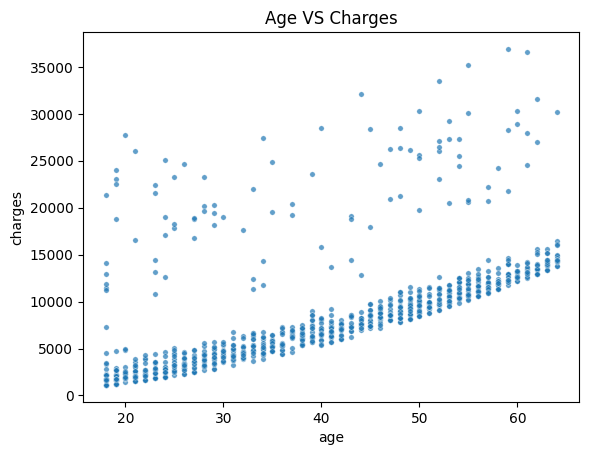

In [114]:
plt.title("Age VS Charges")
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)


A part from a few points,the charges seem to form an aligned scatter. We'll try and 'fit' a line using that sttraight scatter

The line must have the following formula: $$ y = wx + b $$ 



# Machine Learning

In our model the x axis is "age" and the y axis shows "charges". Thus the equation we're looking for is: 
$$ 
\text{charges}=w \cdot \text{age}+b
$$

Our job is to determine w and bfor the best line fitting the data. And we'll do this using linear regression



Here we create our model!

In [115]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()

### Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result

The result can be stored in a single number calculated like the following:
$$
 \text{RMSE}= \sqrt{
\frac{
    \sum_{i=1}^{N} (\text{Predicted}_{i}-\text{Actual}_i)^2
}
{N}
}
$$

In [118]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


First, let's fit our model with the only input being the age!

Setting the inputs and target columuns adn then fitting the model: 

In [129]:
# Create inputs and targets
inputs, targets = df[['age']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11551.66562075632


Since the loss is quite high, it's clear that our model needs additional features to improve the accuracy of its predictions.

We wil add the "bmi" and "children" columns for better training of our model


In [130]:

inputs, targets = df[['age', 'bmi', 'children']], df['charges']

model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI

Since the column "smoker" is our biggest asset so far, we defenitely need to involove it. Infortunately it only contains string values.

Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

In [121]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [122]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


Let's add this new column to our model


In [ ]:

inputs, targets = df[['age', 'bmi', 'children', 'smoker_code']], df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


WOW! This is a big reduction in the loss. From 11355.32 to 6056.44 is incredible!

Let's add the columns left: sex and region

In [131]:
sex_codes = {'female': 0, 'male': 1}
df['sex_code'] = df.sex.map(sex_codes)


In [134]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [135]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [136]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [138]:

inputs, targets = df[['age', 'bmi', 'children', 'smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']], df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


**Conclusion**  
This analysis highlights the effectiveness of using linear regression to identify key factors influencing medical insurance charges. By applying Ordinary Least Squares (OLS) regression, we were able to measure the impact of several variables—particularly smoking status and age—on annual healthcare costs. The results clearly showed that smokers face substantially higher charges, a pattern that becomes even more pronounced when combined with age and BMI. In contrast, variables like sex and the number of children had minimal direct impact.

Seaborn visualizations helped illustrate these relationships clearly. Scatter plots and regression lines made the differences between smokers and non-smokers more evident, while the residual plot indicated that our model successfully captured the core trends in the data, validating the suitability of a linear approach.

Overall, this project reinforces the importance of careful feature selection and proper handling of categorical variables in predictive modeling. It demonstrates how combining statistical methods with visual analysis can lead to meaningful insights, particularly in the context of healthcare cost prediction.